In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset partidos
df_partidos = pd.read_csv("partidos_aura.csv")

# Mostrar primeras filas
df_partidos.head(6)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,AURA FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,AURA FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,AURA FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,AURA FC,3,3,60,40,8,11,Python Arena


In [4]:
# Estadísticas descriptivas generales
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [15]:
# Promedio goles Aura FC como local y visitante
goles_local_aura = df_partidos[df_partidos['equipo_local'] == 'AURA FC']['goles_local'].mean()
goles_visitante_aura = df_partidos[df_partidos['equipo_visitante'] == 'AURA FC']['goles_visitante'].mean()

print("Goles promedio AURA FC como local:", goles_local_aura)
print("Goles promedio AURA FC como visitante:", goles_visitante_aura)

Goles promedio AURA FC como local: 2.230769230769231
Goles promedio AURA FC como visitante: 2.611111111111111


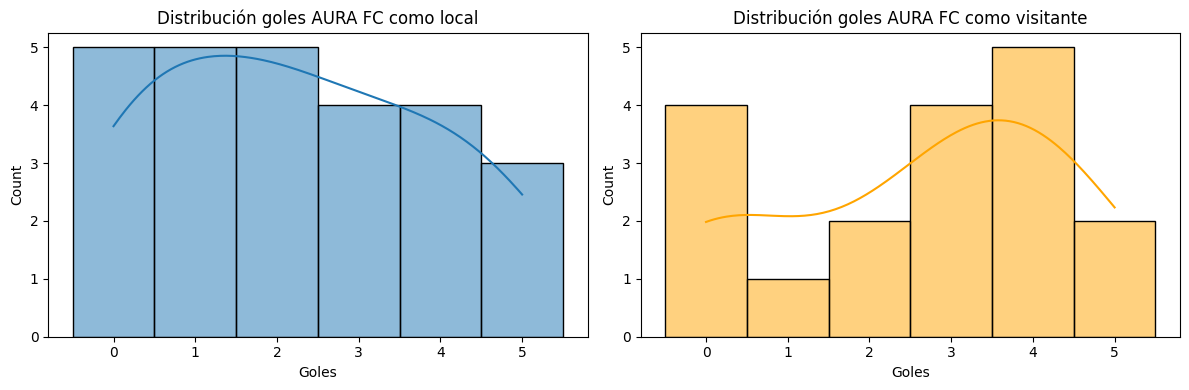

In [21]:
# Histogramas de goles marcados (local y visitante) — AURA FC
# Filtrar series de goles para AURA FC como local y como visitante
goles_local_aura_series = df_partidos[df_partidos['equipo_local'].astype(str).str.strip() == 'AURA FC']['goles_local']
goles_visitante_aura_series = df_partidos[df_partidos['equipo_visitante'].astype(str).str.strip() == 'AURA FC']['goles_visitante']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(goles_local_aura_series, kde=True, ax=ax[0], bins=range(0, 10), discrete=True)
ax[0].set_title('Distribución goles AURA FC como local')
ax[0].set_xlabel('Goles')

sns.histplot(goles_visitante_aura_series, kde=True, ax=ax[1], bins=range(0, 10), discrete=True, color='orange')
ax[1].set_title('Distribución goles AURA FC como visitante')
ax[1].set_xlabel('Goles')

plt.tight_layout()
plt.show()

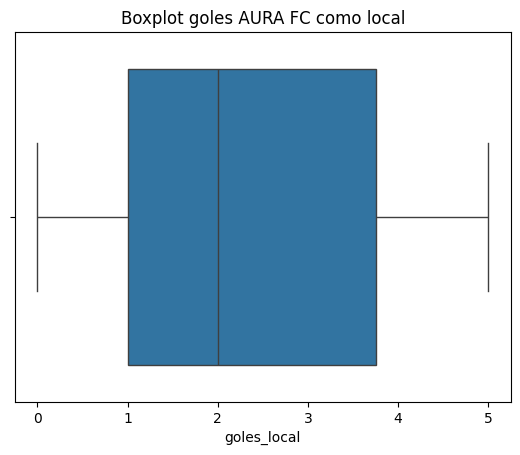

In [24]:
# Boxplot para goles del equipo local
sns.boxplot(x=goles_local_aura_series)
plt.title('Boxplot goles AURA FC como local')
plt.show()

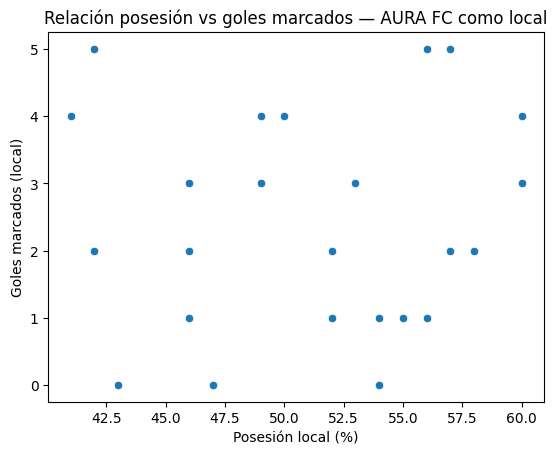

In [27]:
# Scatterplot de posesión vs goles marcados (local) — AURA FC
# Preparar DataFrame con posesión y goles para AURA FC como local
df_local_aura = df_partidos[df_partidos['equipo_local'].astype(str).str.strip() == 'AURA FC'][['posesion_local (%)','goles_local']].copy()
# Limpiar y convertir la columna de posesión si contiene '%' o strings
df_local_aura['posesion_local (%)'] = df_local_aura['posesion_local (%)'].astype(str).str.replace('%', '', regex=False).str.strip()
df_local_aura['posesion_local (%)'] = pd.to_numeric(df_local_aura['posesion_local (%)'], errors='coerce')
# Eliminar filas con NA en las columnas usadas
df_local_aura = df_local_aura.dropna(subset=['posesion_local (%)', 'goles_local'])

# Dibujar scatterplot (posesión vs goles)
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_local_aura)
plt.xlabel('Posesión local (%)')
plt.ylabel('Goles marcados (local)')
plt.title('Relación posesión vs goles marcados — AURA FC como local')
plt.show()